In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 读取processed_data
x_train_bow = np.load('./processed_data/xtrain_bow.npy')
x_test_bow = np.load('./processed_data/xtest_bow.npy')
y_train_bow_tf = np.load('./processed_data/ytrain.npy')
y_test_bow_tf = np.load('./processed_data/ytest.npy')
x_train_tf = np.load('./processed_data/xtrain_tf.npy')
x_test_tf = np.load('./processed_data/xtest_tf.npy')
x_train_vec = np.load('./processed_data/xtrain_vec.npy')
x_test_vec = np.load('./processed_data/xtest_vec.npy')
y_train_vec = np.load('./processed_data/ytrain_vec.npy')
y_test_vec = np.load('./processed_data/ytest_vec.npy')
ytrain = np.load('./processed_data/ytrain.npy')
ytest = np.load('./processed_data/ytest.npy')

In [3]:
# 读取word2idx文件
import pickle
with open('./models/word2idx.pkl','rb') as f:
    word2idx = pickle.load(f)

In [4]:
# 查看一下规模
print(x_train_bow.shape)
print(x_train_tf.shape)
print(x_train_vec.shape)

(5600, 15244)
(5600, 15244)
(5600, 50)


In [5]:
# 查看前十行
print(x_train_bow[:10])
print(x_train_tf[:10])
print(x_train_vec[:10])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0  404  107   18   90  374   52
  1005   45 1368    3  927  178   90  135]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    8    2 1217   68  309 1802   71
  1263    0  117   11   73   71    2   14]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  153
     8  216   11    8    4  328  289   61  413   21  217  284 

In [6]:
# 查看最底层数字的数据类型
print(x_train_bow[0][0].dtype)
print(x_train_tf[0][0].dtype)
print(x_train_vec[0][0].dtype)

int64
float64
int32


# 训练KNN模型

## 1 寻找最优k值

In [7]:
# 计算KNN的K值
def k_classifier_brute(X_train, y_train):
    # 创建奇数K列表
    myList = list(range(0,100))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))

    # 创建空列表保存cv值
    cv_scores = []

    # 10折交叉验证
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, algorithm = "brute")
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    # 更改为分类错误
    MSE = [1 - x for x in cv_scores]

    # 选取最佳k值
    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)
    
    # 生成分类错误和k的图
    plt.plot(neighbors, MSE)

    for xy in zip(neighbors, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("Misclassification Error vs K")
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    return optimal_k


The optimal number of neighbors is 15.


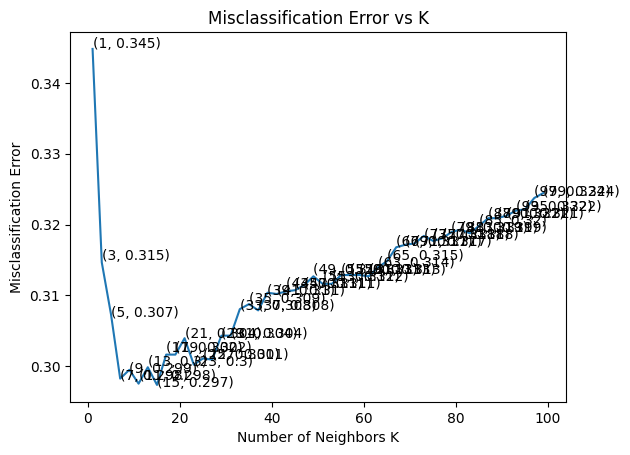

the misclassification error for each k value is :  [0.345 0.315 0.307 0.298 0.299 0.298 0.3   0.297 0.302 0.302 0.304 0.3
 0.301 0.301 0.304 0.304 0.308 0.309 0.308 0.31  0.31  0.311 0.311 0.311
 0.313 0.312 0.312 0.313 0.313 0.313 0.313 0.314 0.315 0.317 0.317 0.317
 0.318 0.318 0.318 0.319 0.319 0.319 0.32  0.321 0.321 0.321 0.322 0.322
 0.324 0.324]


15

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
optimal_k_bow = k_classifier_brute(x_train_bow, y_train_bow_tf)
optimal_k_bow


The optimal number of neighbors is 31.


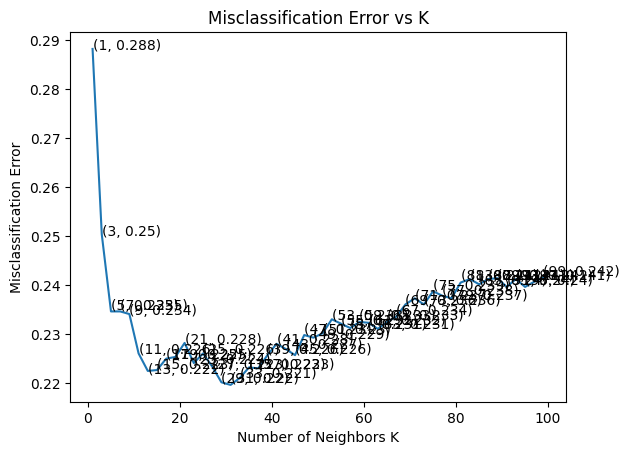

the misclassification error for each k value is :  [0.288 0.25  0.235 0.235 0.234 0.226 0.222 0.223 0.225 0.225 0.228 0.224
 0.226 0.223 0.22  0.22  0.221 0.223 0.223 0.226 0.228 0.227 0.226 0.23
 0.229 0.23  0.233 0.232 0.231 0.233 0.232 0.231 0.233 0.234 0.236 0.237
 0.236 0.239 0.238 0.237 0.241 0.241 0.24  0.241 0.241 0.24  0.241 0.24
 0.241 0.242]


31

In [10]:
optimal_k_tf = k_classifier_brute(x_train_tf, y_train_bow_tf)
optimal_k_tf

## 2 KNN BOW

In [11]:
#K-NN 训练BOW
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors= optimal_k_bow, metric = 'minkowski' , p = 2)
classifier1.fit(x_train_bow , y_train_bow_tf)

KNeighborsClassifier(n_neighbors=15)

In [13]:
# 预测
y_pred_bow = classifier1.predict(x_test_bow)
y_pred_bow.shape

(2400,)

In [14]:
# 计算准确率
from sklearn.metrics import confusion_matrix
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

#making the confusion matrix
cm1 = confusion_matrix(y_test_bow_tf , y_pred_bow)
accuracy(cm1)

0.6983333333333334

## 3 KNN tf

In [15]:
#K-NN 训练TF
classifier2 = KNeighborsClassifier(n_neighbors= optimal_k_tf, metric = 'minkowski' , p = 2)
classifier2.fit(x_train_tf , y_train_bow_tf)

KNeighborsClassifier(n_neighbors=31)

In [16]:
# 预测
y_pred_tf = classifier2.predict(x_test_tf)
y_pred_tf.shape

(2400,)

In [17]:
# 计算准确率
from sklearn.metrics import confusion_matrix
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

#making the confusion matrix
cm2 = confusion_matrix(y_test_bow_tf , y_pred_tf)
accuracy(cm2)

0.7716666666666666

# 训练逻辑回归模型

In [19]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(random_state = 42, max_iter=1000)
lr1.fit(x_train_tf , y_train_bow_tf)
y_pred_lrtf = lr1.predict(x_test_tf)
print("Accuracy: ",round(metrics.accuracy_score(y_test_bow_tf,y_pred_lrtf),3))
print("F1: ",round(metrics.f1_score(y_test_bow_tf,y_pred_lrtf),3))

Accuracy:  0.818
F1:  0.678


In [20]:
lr2 = LogisticRegression(random_state = 42, max_iter=1000)
lr2.fit(x_train_bow , y_train_bow_tf)
y_pred_lrbow = lr2.predict(x_test_bow)
print("Accuracy: ",round(metrics.accuracy_score(y_test_bow_tf,y_pred_lrbow),3))
print("F1: ",round(metrics.f1_score(y_test_bow_tf,y_pred_lrbow),3))

Accuracy:  0.826
F1:  0.724


# 训练LSTM

In [ ]:
# 需要下载pytorch GPU版本，配合cuda，不然训练速度可能较慢
# 参考：https://zhuanlan.zhihu.com/p/106133822 进行安装相应版本

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
# 使用GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU is not available, CPU is used") 

In [25]:
# TensorDataset 就类似zip变为元组形式
# DataLoader 就是类似list进行不过就是将一个batch打包在一起加速，元素变为一个batch了

# 从 x_test_vec 中使用随机数切分为验证集和测试集

# 随机数种子
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# 随机数切分
from sklearn.model_selection import train_test_split
x_test_vec, x_val_vec, y_test_vec, y_val_vec = train_test_split(x_test_vec, y_test_vec, test_size=0.1, random_state=seed)

# 转换为TensorDataset
train_data_vec = TensorDataset(torch.from_numpy(x_train_vec).type(torch.Tensor), torch.from_numpy(y_train_vec).type(torch.Tensor))
val_data_vec = TensorDataset(torch.from_numpy(x_val_vec).type(torch.Tensor), torch.from_numpy(y_val_vec).type(torch.Tensor))
test_data_vec = TensorDataset(torch.from_numpy(x_test_vec).type(torch.Tensor), torch.from_numpy(y_test_vec).type(torch.Tensor))

batch_size = 40

# 设置drop_last 防止最后一个batch不够batch_size，导致数据量不对
train_loader_vec = DataLoader(train_data_vec, shuffle=True, batch_size=batch_size,drop_last=True)
val_loader_vec = DataLoader(val_data_vec, shuffle=True, batch_size=batch_size,drop_last=True)
test_loader_vec = DataLoader(test_data_vec, shuffle=True, batch_size=batch_size,drop_last=True)

In [26]:
# 查看数据训练的规模
print(train_loader_vec.dataset.tensors[0].shape)
print(val_loader_vec.dataset.tensors[0].shape)
print(test_loader_vec.dataset.tensors[0].shape)

torch.Size([5600, 50])
torch.Size([240, 50])
torch.Size([2160, 50])


In [27]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super(LSTM, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sigmoid(out)
        
        out = out.view(batch_size, -1)
        out = out[:,-1]
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

In [35]:
vocab_size = len(word2idx) + 1
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

model = LSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
model.to(device)

lr=0.005
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [36]:
epochs = 3
counter = 0
clip = 5
valid_loss_min = np.Inf

if(torch.cuda.is_available()):
    model.cuda()

model.train()

for i in range(epochs):    
    h = model.init_hidden(batch_size)
    
    for inputs, labels in train_loader_vec:
        counter += 1
        h = tuple([e.data for e in h])
        inputs, labels = inputs.to(device), labels.to(device)
        model.zero_grad()
        output, h = model(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        if counter % 100 == 0 :
            val_h = model.init_hidden(batch_size)
            val_losses = []
            model.eval()
            for inp, lab in val_loader_vec:
                val_h = tuple([each.data for each in val_h])
                inp, lab = inp.to(device), lab.to(device)
                out, val_h = model(inp, val_h)
                val_loss = criterion(out.squeeze(), lab.float())
                val_losses.append(val_loss.item())
                
            model.train()
            print("Epoch: {}/{}...".format(i+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
            if np.mean(val_losses) <= valid_loss_min:
                torch.save(model.state_dict(), './models/state_dict.pt')
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
                valid_loss_min = np.mean(val_losses)
        

Epoch: 1/3... Step: 100... Loss: 0.501291... Val Loss: 0.549179
Validation loss decreased (inf --> 0.549179).  Saving model ...
Epoch: 2/3... Step: 200... Loss: 0.348684... Val Loss: 0.484888
Validation loss decreased (0.549179 --> 0.484888).  Saving model ...
Epoch: 3/3... Step: 300... Loss: 0.422833... Val Loss: 0.618378
Epoch: 3/3... Step: 400... Loss: 0.208310... Val Loss: 0.497837


In [37]:
# 读取最优模型
model.load_state_dict(torch.load('./models/state_dict.pt'))


# 检测模型的准确率，用于微调模型，初步查看以下
test_losses = []
num_correct = 0
h = model.init_hidden(batch_size)

model.eval()
for inputs, labels in test_loader_vec:
    h = tuple([each.data for each in h])
    inputs, labels = inputs.to(device), labels.to(device)
    output, h = model(inputs, h)
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    pred = torch.round(output.squeeze())  # Rounds the output to 0/1
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

print("Test loss: {:.3f}".format(np.mean(test_losses)))
test_acc = num_correct/len(test_loader_vec.dataset)
print("Test accuracy: {:.3f}%".format(test_acc*100))

Test loss: 0.494
Test accuracy: 79.537%
